# Concordia Plots
|Author  | Stanley A. Baronett|
|--------|--------------------|
|Created | 3/3/2022           |
|Updated | 5/16/2022          |

## Wetherill
From [Schoene (2014)](https://doi.org/10.1016/B978-0-08-095975-7.00310-7), the U-Th-Pb system leads to the following simplified, classic isochron equations, where the initial lead contribution in zircon is negligible compared to the radiogenic component:
\begin{align}
  \left(\frac{^{206}\mathrm{Pb}^*}{^{238}\mathrm{U}}\right)&=\left(e^{\lambda_{238}t-1}\right)\\
  \left(\frac{^{207}\mathrm{Pb}^*}{^{235}\mathrm{U}}\right)&=\left(e^{\lambda_{235}t-1}\right),
  \tag{6, 7}
\end{align}
where $^*$ stands for *radiogenic*, $t$ is the time since the system closed (e.g., crystallization of a mineral), $\lambda_{238}=1.55125\times10^{-10}\,\mathrm{yr}^{-1}$ and $\lambda_{235}=9.8485\times10^{-10}\,\mathrm{yr}^{-1}$ (Fig. 2) are the decay constants of $^{238}\mathrm{U}$ and $^{235}\mathrm{U}$.

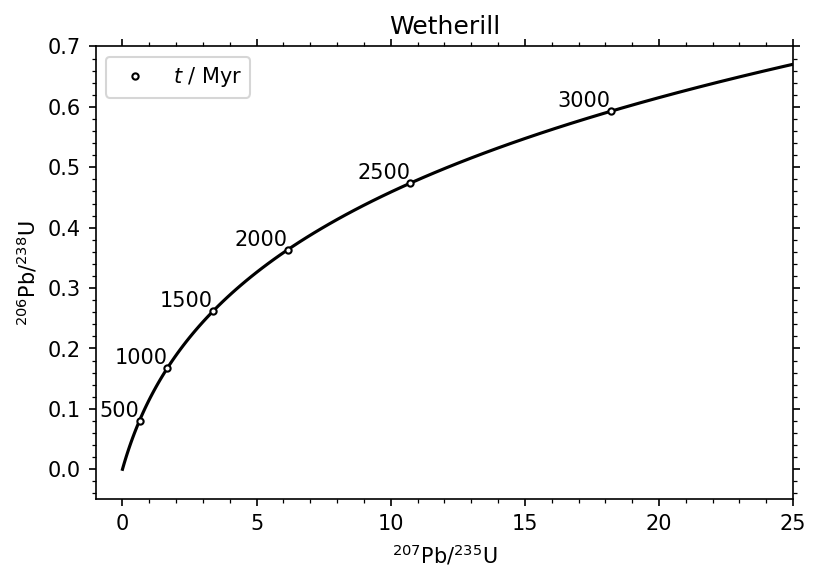

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Eqs. and decay constants from Schoene (2014)
decay = lambda t, hl : np.exp(hl*t) - 1 # Eqs. [6], [7]
lambda_238 = 1.55125e-10 # / yr
lambda_235 = 9.8485e-10  # / yr
ts = np.linspace(0, 3.4e9, 100)
Pb206_U238 = decay(ts, lambda_238)
Pb207_U235 = decay(ts, lambda_235)
pts = 1e6*np.arange(500, 3500, 500) # Myr
xpts = decay(pts, lambda_235)
ypts = decay(pts, lambda_238)
fig, ax = plt.subplots(dpi=150)

for i, pt in enumerate(pts):
    ax.annotate(f'{pt/1e6:n}', xy=(xpts[i], ypts[i]), ha='right', va='bottom')

ax.plot(Pb207_U235, Pb206_U238, 'k')
ax.plot(xpts, ypts, '.w', markeredgecolor='k', label=r'$t$ / Myr')
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$^{207}\mathrm{Pb}/^{235}\mathrm{U}$',
       ylabel=r'$^{206}\mathrm{Pb}/^{238}\mathrm{U}$',
       xlim=(-1, 25), ylim=(-0.05,0.7), title='Wetherill')
ax.tick_params(axis='both', which='both', top=True, right=True)

## Tera–Wasserburg (T–W)

From [Schoene (2014)](https://doi.org/10.1016/B978-0-08-095975-7.00310-7),
\begin{equation}
  \left(\frac{^{235}\mathrm{U}^*}{^{238}\mathrm{U}}\right)\frac{\left(e^{\lambda_{235}t-1}\right)}{\left(e^{\lambda_{238}t-1}\right)}=\left(\frac{^{207}\mathrm{Pb}}{^{206}\mathrm{Pb}}\right)^*
  \tag{9}
\end{equation}
where $(^{235}\mathrm{U}^*/^{238}\mathrm{U})^{-1}=137.88$ of natural uranium in most terrestrial materials ($\S~4.10.5.2$, p. 359)

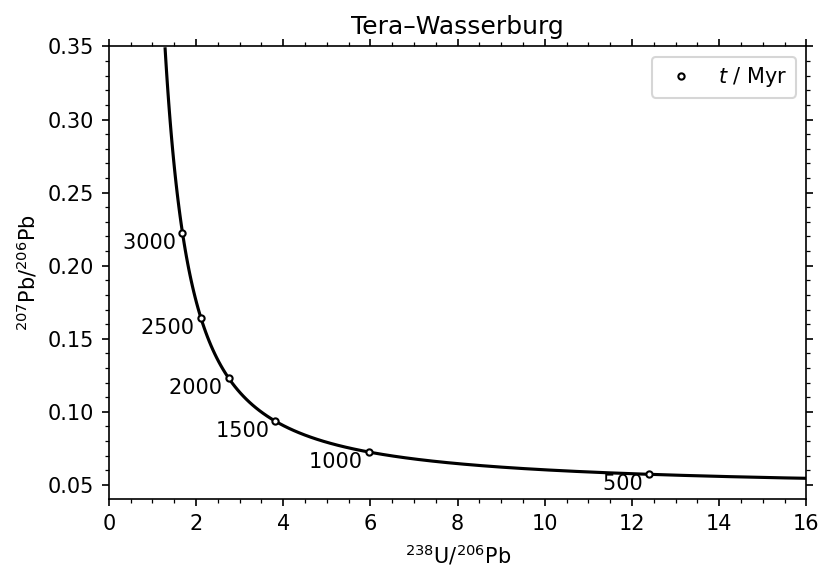

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Eqs. and decay constants from Schoene (2014)
decay = lambda t, hl : np.exp(hl*t) - 1 # Eqs. [6], [7]
lambda_238 = 1.55125e-10 # / yr
lambda_235 = 9.8485e-10  # / yr
ts = np.linspace(3e8, 3.7e9, 100)
Pb206_U238 = decay(ts, lambda_238)
Pb207_U235 = decay(ts, lambda_235)
pts = 1e6*np.arange(500, 3500, 500) # Myr
U238_U235 = 137.88 # § 4.10.5.2, p. 359
Pb207_Pb206 = Pb207_U235/Pb206_U238/U238_U235 # Eq. [9]
xpts = 1/decay(pts, lambda_238)
ypts = decay(pts, lambda_235)*xpts/U238_U235
fig, ax = plt.subplots(dpi=150)

for i, pt in enumerate(pts):
    ax.annotate(f'{pt/1e6:n} ', xy=(xpts[i], ypts[i]), ha='right', va='top')

ax.plot(1/Pb206_U238, Pb207_Pb206, 'k')
ax.plot(xpts, ypts, '.w', markeredgecolor='k', label=r'$t$ / Myr')
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$^{238}\mathrm{U}/^{206}\mathrm{Pb}$',
       ylabel=r'$^{207}\mathrm{Pb}/^{206}\mathrm{Pb}$',
       xlim=(0,16), ylim=(0.04,0.35), title='Tera–Wasserburg')
ax.tick_params(axis='both', which='both', top=True, right=True)

## Mixing
From [Langmuir et al. (1978)](https://doi.org/10.1016/0012-821X(78)90053-5), the general mixing, hyperbolic equation for two components is
\begin{equation}
  Ax+Bxy+Cy+D=0,
  \tag{1}
\end{equation}
where, from [Vollmer (1976)](https://doi-org.ezproxy.library.unlv.edu/10.1016/0016-7037(76)90205-2), the coefficients of Eq. (1) are
\begin{align}
  A &= a_2b_1y_2-a_1b_2y_1,\\
  B &= a_1b_2-a_2b_1,\\
  C &= a_2b_1x_1-a_1b_2x_2,\\
  D &= a_1b_2x_2y_1-a_2b_1x_1y_2,\\
  \tag{2}
\end{align}
and
\begin{align*}
  y &= fy_1+(1-f)y_2\\
  x &= \frac{f\frac{b_1}{a_1}x_1+(1-f)\frac{b_2}{a_2}x_2}{f\frac{b_1}{a_1}+(1-f)\frac{b_2}{a_2}}\\
  f &= \frac{a_1}{\sum a_i}\\
  r &= \frac{a_1b_2}{a_2b_1}.
\end{align*}

In general, $x$ and $y$ respectively are abscissa and ordinate variables, $x_i$ and $y_i$ are coordinates at data point $i$, and $a_i$ and $b_i$ are the denominators of $y_i$ and $x_i$, respectively.
If $r=1$, then $B=0$ and the mixing curve is a straight line.
For our Wetherill diagram, $x_i = (^{207}\mathrm{Pb}/^{235}\mathrm{U})_i$ and $y_i = (^{206}\mathrm{Pb}/^{238}\mathrm{U})_i$ , with $a_i = \,^{238}\mathrm{U}_i$ and $b_i = \,^{235}\mathrm{U}_i$.

### Figure 4(a), [Schoene (2014)](https://doi.org/10.1016/B978-0-08-095975-7.00310-7)
> Example of a 1700 Ma zircon losing Pb or mixing with metamorphic overgrowth. $t_0$ is the crystallization age of the zircons; after 1700 My of closed-system ingrowth of Pb, the zircons appears on concordia at $t_1$; at $t_2$ the zircon suffers Pb loss or growth of new zircon around old core; $t^\prime$ represents zircons that are discordant following partial Pb loss or mineral overgrowth at $t_2$.

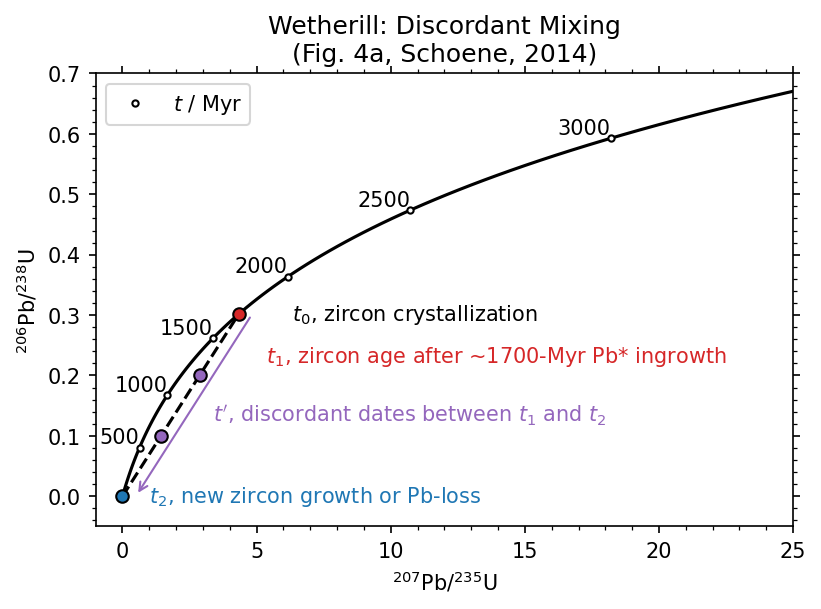

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Eqs. and decay constants from Schoene (2014)
decay = lambda t, hl : np.exp(hl*t) - 1 # Eqs. [6], [7]
lambda_238 = 1.55125e-10 # / yr
lambda_235 = 9.8485e-10  # / yr
ts = np.linspace(0, 3.4e9, 100)
Pb206_U238 = decay(ts, lambda_238)
Pb207_U235 = decay(ts, lambda_235)
pts = 1e6*np.arange(500, 3500, 500) # Myr
xpts = decay(pts, lambda_235)
ypts = decay(pts, lambda_238)

# Mixing lines
fs, f1, f2 = np.linspace(0, 1), 2/3, 1/3
ymix = lambda f, y1, y2 : f*y1 + (1 - f)*y2
xmix = lambda f, x1, x2 : (f*x1 + (1 - f)*x2)/(f + (1 - f))
t1, t2 = 1700e6, 0
x1, y1 = decay(t1, lambda_235), decay(t1, lambda_238)
x2, y2 = decay(t2, lambda_235), decay(t2, lambda_238)
xs, ys = xmix(fs, x1, x2), ymix(fs, y1, y2)
xp1, yp1 = xmix(f1, x1, x2), ymix(f1, y1, y2)
xp2, yp2 = xmix(f2, x1, x2), ymix(f2, y1, y2)
fig, ax = plt.subplots(dpi=150)

for i, pt in enumerate(pts):
    ax.annotate(f'{pt/1e6:n}', xy=(xpts[i], ypts[i]), ha='right', va='bottom')

ax.annotate('', xy=(0+0.5, 0), xytext=(x1+0.5, y1),
            arrowprops=dict(arrowstyle="->", color='tab:purple'))
ax.plot(xs, ys, '--k')
ax.plot(Pb207_U235, Pb206_U238, 'k')
ax.plot(xpts, ypts, '.w', markeredgecolor='k', label=r'$t$ / Myr')
ax.plot(x1, y1, 'o', color='tab:red', markeredgecolor='k')
ax.plot(x2, y2, 'o', color='tab:blue', markeredgecolor='k')
ax.annotate(r'$t_0$, zircon crystallization',
            xy=(x1+2, y1), ha='left', va='center')
ax.annotate(r'$t_1$, zircon age after ~1700-Myr Pb* ingrowth',
            xy=(x1+1, y1-0.05), ha='left', va='top', color='tab:red')
ax.annotate(r'$t_2$, new zircon growth or Pb-loss',
            xy=(x2+1, y2), ha='left', va='center', color='tab:blue')
ax.annotate(r'$t^\prime$, discordant dates between $t_1$ and $t_2$',
            xy=(xp1+0.5, yp1-0.067), ha='left', va='center', color='tab:purple')
ax.plot(xp1, yp1, 'o', color='tab:purple', markeredgecolor='k')
ax.plot(xp2, yp2, 'o', color='tab:purple', markeredgecolor='k')
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$^{207}\mathrm{Pb}/^{235}\mathrm{U}$',
       ylabel=r'$^{206}\mathrm{Pb}/^{238}\mathrm{U}$',
       xlim=(-1, 25), ylim=(-0.05,0.7),
       title='Wetherill: Discordant Mixing\n(Fig. 4a, Schoene, 2014)')
ax.tick_params(axis='both', which='both', top=True, right=True)

### Figure 4(b), [Schoene (2014)](https://doi.org/10.1016/B978-0-08-095975-7.00310-7)
> The same data after the system has closed again and continues to evolve up the concordia curve. The discordia line defined by purple analyses now has an upper intercept with concordia representing the original igneous crystallization event at $t_1$, and a lower intercept age representing $t_2$, the time before the present at which Pb loss or overgrowth occurred.

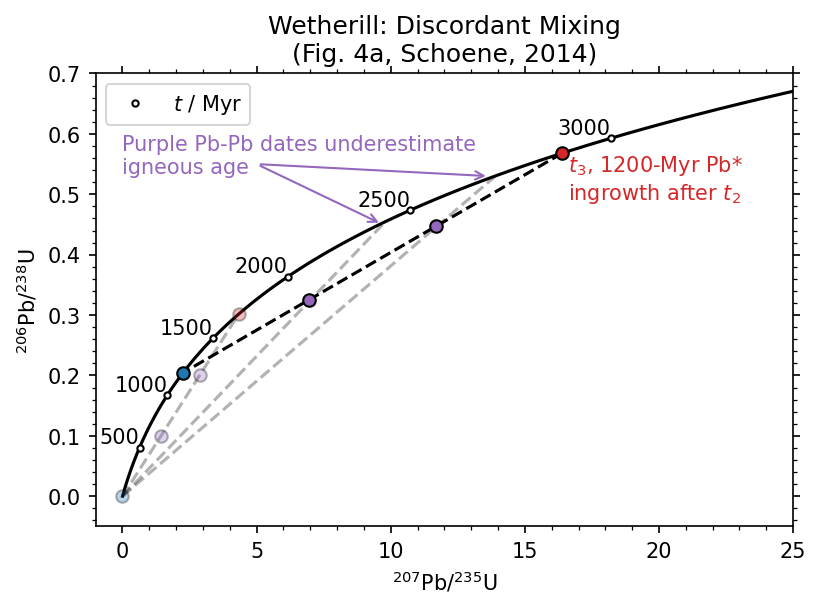

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Eqs. and decay constants from Schoene (2014)
decay = lambda t, hl : np.exp(hl*t) - 1 # Eqs. [6], [7]
lambda_238 = 1.55125e-10 # / yr
lambda_235 = 9.8485e-10  # / yr
ts = np.linspace(0, 3.4e9, 100)
Pb206_U238 = decay(ts, lambda_238)
Pb207_U235 = decay(ts, lambda_235)
pts = 1e6*np.arange(500, 3500, 500) # Myr
xpts = decay(pts, lambda_235)
ypts = decay(pts, lambda_238)

# Mixing lines
fs, f1, f2 = np.linspace(0, 1), 2/3, 1/3
ymix = lambda f, y1, y2 : f*y1 + (1 - f)*y2
xmix = lambda f, x1, x2 : (f*x1 + (1 - f)*x2)/(f + (1 - f))
t1, t2 = 1700e6, 0
x1, y1 = decay(t1, lambda_235), decay(t1, lambda_238)
x2, y2 = decay(t2, lambda_235), decay(t2, lambda_238)
xs, ys = xmix(fs, x1, x2), ymix(fs, y1, y2)
xp1, yp1 = xmix(f1, x1, x2), ymix(f1, y1, y2)
xp2, yp2 = xmix(f2, x1, x2), ymix(f2, y1, y2)
# Continued growth after re-closed
t2a, t3 = 1200e6, 2900e6
x2a, y2a = decay(t2a, lambda_235), decay(t2a, lambda_238)
x3, y3 = decay(t3, lambda_235), decay(t3, lambda_238)
xs3, ys3 = xmix(fs, x2a, x3), ymix(fs, y2a, y3)
# xp3a, yp3a = (f1*x2a + (1 - f1)*x3)/(f1 + (1 - f1)), f1*y2a + (1 - f1)*y3
# xp3b, yp3b = (f2*x2a + (1 - f2)*x3)/(f2 + (1 - f2)), f2*y2a + (1 - f2)*y3
xp3a, yp3a = xmix(f1, x2a, x3), ymix(f1, y2a, y3)
xp3b, yp3b = xmix(f2, x2a, x3), ymix(f2, y2a, y3)
fig, ax = plt.subplots(dpi=150)

for i, pt in enumerate(pts):
    ax.annotate(f'{pt/1e6:n}', xy=(xpts[i], ypts[i]), ha='right', va='bottom')


ax.plot(xs, ys, '--k', alpha=0.3)
ax.plot(Pb207_U235, Pb206_U238, 'k')
ax.plot(xpts, ypts, '.w', markeredgecolor='k', label=r'$t$ / Myr')
ax.plot(x1, y1, 'o', color='tab:red', markeredgecolor='k', alpha=0.3)
ax.plot(x2, y2, 'o', color='tab:blue', markeredgecolor='k', alpha=0.3)
# Age underestimates
ax.plot([x2, 9.7], [y2, 0.45], '--k', alpha=0.3)
ax.plot([x2, 13.9], [y2, 0.53], '--k', alpha=0.3)
ax.annotate('Purple Pb–Pb dates underestimate\nigneous age',
            xy=(0, 0.6), ha='left', va='top', color='tab:purple')
ax.annotate('', xy=(9.7, 0.45), xytext=(5, 0.55),
            arrowprops=dict(arrowstyle="->", color='tab:purple'))
ax.annotate('', xy=(13.7, 0.53), xytext=(5, 0.55),
            arrowprops=dict(arrowstyle="->", color='tab:purple'))
# Continued growth after re-closed
ax.plot(xs3, ys3, '--k')
ax.plot(x2a, y2a, 'o', color='tab:blue', markeredgecolor='k')
ax.plot(x3, y3, 'o', color='tab:red', markeredgecolor='k')
ax.plot(xp1, yp1, 'o', color='tab:purple', markeredgecolor='k', alpha=0.3)
ax.plot(xp2, yp2, 'o', color='tab:purple', markeredgecolor='k', alpha=0.3)
ax.plot(xp3a, yp3a, 'o', color='tab:purple', markeredgecolor='k')
ax.plot(xp3b, yp3b, 'o', color='tab:purple', markeredgecolor='k')
label = r'$t_3$, 1200-Myr Pb*'+'\n'+r'ingrowth after $t_2$'
ax.annotate(label, xy=(x3+0.2, y3), ha='left', va='top', color='tab:red')
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$^{207}\mathrm{Pb}/^{235}\mathrm{U}$',
       ylabel=r'$^{206}\mathrm{Pb}/^{238}\mathrm{U}$',
       xlim=(-1, 25), ylim=(-0.05,0.7),
       title='Wetherill: Discordant Mixing\n(Fig. 4a, Schoene, 2014)')
ax.tick_params(axis='both', which='both', top=True, right=True)

### Figure 4(c), [Schoene (2014)](https://doi.org/10.1016/B978-0-08-095975-7.00310-7)
> The same scenario as in (b) but in a T–W diagram.

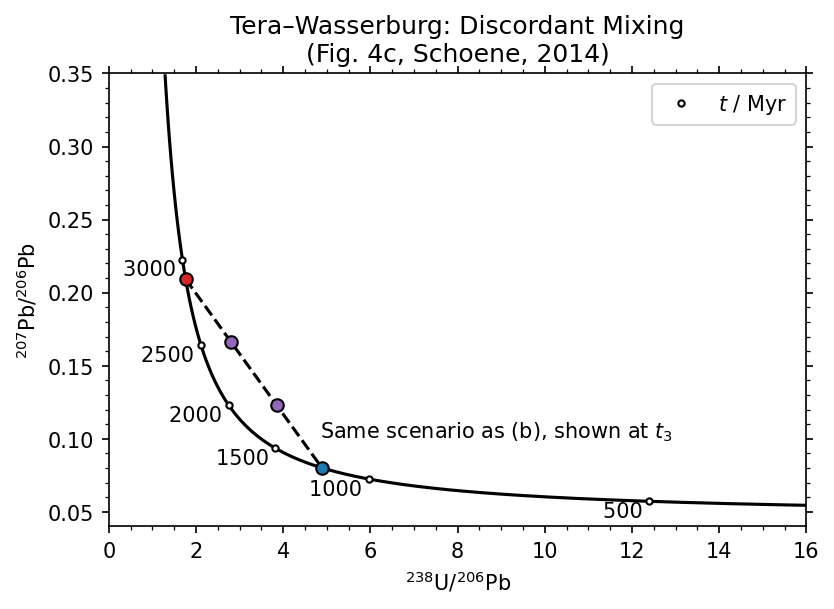

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Eqs. and decay constants from Schoene (2014)
decay = lambda t, hl : np.exp(hl*t) - 1 # Eqs. [6], [7]
lambda_238 = 1.55125e-10 # / yr
lambda_235 = 9.8485e-10  # / yr
ts = np.linspace(3e8, 3.7e9, 100)
Pb206_U238 = decay(ts, lambda_238)
Pb207_U235 = decay(ts, lambda_235)
pts = 1e6*np.arange(500, 3500, 500) # Myr
U238_U235 = 137.88 # § 4.10.5.2, p. 359
Pb207_Pb206 = Pb207_U235/Pb206_U238/U238_U235 # Eq. [9]
xpts = 1/decay(pts, lambda_238)
ypts = decay(pts, lambda_235)*xpts/U238_U235
fig, ax = plt.subplots(dpi=150)

# Mixing lines
fs, f1, f2 = np.linspace(0, 1), 2/3, 1/3
ymix = lambda f, y1, y2 : f*y1 + (1 - f)*y2
xmix = lambda f, x1, x2 : (f*x1 + (1 - f)*x2)/(f + (1 - f))
t2a, t3 = 1200e6, 2900e6
x2a, x3 = 1/decay(t2a, lambda_238), 1/decay(t3, lambda_238)
y2a, y3 = decay(t2a, lambda_235)*x2a/U238_U235, decay(t3, lambda_235)*x3/U238_U235
xs3, ys3 = xmix(fs, x2a, x3), ymix(fs, y2a, y3)
xp3a, yp3a = xmix(f1, x2a, x3), ymix(f1, y2a, y3)
xp3b, yp3b = xmix(f2, x2a, x3), ymix(f2, y2a, y3)

for i, pt in enumerate(pts):
    ax.annotate(f'{pt/1e6:n} ', xy=(xpts[i], ypts[i]), ha='right', va='top')

ax.plot(1/Pb206_U238, Pb207_Pb206, 'k')
ax.plot(xpts, ypts, '.w', markeredgecolor='k', label=r'$t$ / Myr')
# Continued growth after re-closed
ax.plot(xs3, ys3, '--k')
ax.plot(x2a, y2a, 'o', color='tab:blue', markeredgecolor='k')
ax.plot(x3, y3, 'o', color='tab:red', markeredgecolor='k')
ax.plot(xp3a, yp3a, 'o', color='tab:purple', markeredgecolor='k')
ax.plot(xp3b, yp3b, 'o', color='tab:purple', markeredgecolor='k')
ax.annotate(r'Same scenario as (b), shown at $t_3$',
            xy=(xp3a+1, yp3a-0.01), ha='left', va='top')
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$^{238}\mathrm{U}/^{206}\mathrm{Pb}$',
       ylabel=r'$^{207}\mathrm{Pb}/^{206}\mathrm{Pb}$',
       xlim=(0,16), ylim=(0.04,0.35),
       title='Tera–Wasserburg: Discordant Mixing\n(Fig. 4c, Schoene, 2014)')
ax.tick_params(axis='both', which='both', top=True, right=True)

### Figure 4(d), [Schoene (2014)](https://doi.org/10.1016/B978-0-08-095975-7.00310-7)
![Schoene (2014), Fig. 4d](../img/Schoene_2014_Fig_4d.png)
> Illustration of how the scenario in (a) and (b) would possibly
be recorded in the event of metamorphism as $t_2$.

### Figure 4(e), [Schoene (2014)](https://doi.org/10.1016/B978-0-08-095975-7.00310-7)
![Schoene (2014), Fig. 4d](../img/Schoene_2014_Fig_4e.png)
> The case where Pb loss happens at $t_2$.